In [1]:

import numpy as np
from scipy import stats
import pyutils.fig as fg
import STmodel.data.cases as stc
import STmodel.model.st as stm
import STmodel.model.stuq as stu


In [2]:

case = stc.case.CaseSet('Aspden_2017_methane')


In [3]:

nx = 50
ny = 200

ur_list = np.linspace(0.1, 20, num=nx)
lr = 1.0

sr_list = np.zeros(nx)

sr_ave = np.zeros(nx)
sr_std = np.zeros(nx)

sr_p = np.linspace(0, 40, num=ny)

pdf = np.zeros((nx, ny))


In [4]:

A_s, B_s, T_s, C_s = stu.sample_params(1000)


In [5]:

config = fg.PlotConfig('manuscript_single')


In [6]:

unburnt = 'T-298_p-1_phi-0.7'
data = case.get_case_data(unburnt)

r = case.get_reactant(unburnt)

mixture = stm.Model(r)


In [7]:

for i, ur in enumerate(ur_list):
    # calculate model predicitons
    sr_list[i] = mixture.ratio_turbulent_burning_velocity(ur, lr)
    # calculate uncertainty
    sr_MC = stu.fwd_params(ur, lr,
                           unburnt,
                           case.get_fuel_stream(),
                           case.get_oxy_stream(),
                           case.get_mechanism(),
                           A_s, B_s, T_s, C_s)

    kde = stats.gaussian_kde(sr_MC)
    pdf_ur = kde(sr_p)
    pdf[i] = pdf_ur

    sr_ave[i] = np.average(sr_MC)
    sr_std[i] = np.std(sr_MC)


Text(0, 0.5, '$s_T/s_L^0$')

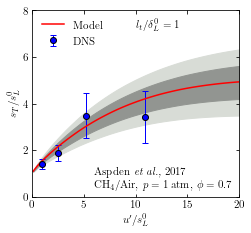

In [8]:

fig, ax = config.get_simple()

ax.errorbar(data.turbulence_intensity,
            data.turbulent_burning_velocity,
            yerr=data.turbulent_burning_velocity_std,
            fmt='o', c='b', mec='k', ms=6, mew=1,
            capsize=3, capthick=1.5, elinewidth=1,
            label='DNS')

ax.plot(ur_list, sr_list, '-r', label='Model')

ax.fill_between(ur_list, sr_ave - 2.0 * sr_std, sr_ave + 2.0 * sr_std,
                color='xkcd:light grey')
ax.fill_between(ur_list, sr_ave - sr_std, sr_ave + sr_std,
                color='xkcd:grey')

ax.set_xlim(0, 20)
ax.set_ylim(0, 8)

ax.set_xticks(np.linspace(0, 20, num=5))
ax.set_yticks(np.linspace(0, 8, num=5))

ax.legend(frameon=False, loc='upper left')

ax.text(6,0.4,
        'Aspden {\it{et al.,}} 2017\n'
        +r'CH$_4$/Air, $p=1\;\mathrm{atm}$, $\phi=0.7$')

ax.text(10,7.28,r'$l_t/\delta_L^0=1$')

ax.tick_params(which='major', direction='in', bottom=True, top=True, left=True, right=True)

ax.set_xlabel(r'$u^\prime/s_L^0$')
ax.set_ylabel(r'$s_T/s_L^0$')
